<a href="https://colab.research.google.com/github/RafaRodri/projeto-imersao-ia/blob/main/projeto_imersao_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Receitas Fáceis
Converse com nossa assistente virtual Ana Maria, e aprenda preparar pratos deliciosos de uma forma muito leve e fácil.

## Install e Imports

### Install Google Generative AI

In [1]:
!pip install -U -q google-generativeai

### Import libs

In [3]:
#Importações e configurações iniciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import google.generativeai as genai
from google.colab import userdata
from google.colab import files
from google.colab import autoviz

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Kaggle

### Install Kaggle

Aprendi o passo a passo em: https://www.youtube.com/watch?v=80uKRGbqmdw

In [2]:
!pip install q kaggle

### Upload do arquivo kaggle.json para a API
O arquivo é necessário para autenticar a conta no Kaggle e acessar conjuntos de dados diretamente do Kaggle para o Colab.

In [4]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rafarodri","key":"8a6c86c039a092b758440cc286c8445e"}'}

### Criar uma pasta no diretório do usuário
O comando `!mkdir ~/.kaggle` é usado para criar uma nova pasta chamada `.kaggle` no diretório principal do usuário.


In [5]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### Copiar as credenciais da API do Kaggle para a pasta criada
O comando `!cp kaggle.json ~/.kaggle/` é usado para copiar o arquivo de credenciais da API do Kaggle chamado `kaggle.json` para a pasta `.kaggle` no diretório principal do usuário.


In [6]:
!cp kaggle.json ~/.kaggle/

### Alterar as permissões do <code>kaggle.json</code>
O comando `!chmod 600 ~/.kaggle/kaggle.json` é usado para alterar as permissões do arquivo de credenciais da API do Kaggle chamado `kaggle.json` para que apenas o usuário tenha permissão de leitura e escrita.


In [7]:
! chmod 600 ~/.kaggle/kaggle.json

### Baixar o conjunto de dados que iremos utilizar
Vamos fazer o download do conjunto de dados que será usado no projeto. Este comando utiliza o cliente da linha de comando do Kaggle para fazer o download do conjunto de dados especificado.


In [8]:
!kaggle datasets download -d pes12017000148/food-ingredients-and-recipe-dataset-with-images

Dataset URL: https://www.kaggle.com/datasets/pes12017000148/food-ingredients-and-recipe-dataset-with-images
License(s): CC-BY-SA-3.0
 95% 196M/206M [00:01<00:00, 165MB/s]
100% 206M/206M [00:01<00:00, 144MB/s]


### Descompactar o obter o arquivo CSV
Vamos descompactar o conjunto de dados baixado e obter o arquivo CSV contido nele.

In [9]:
! unzip /content/food-ingredients-and-recipe-dataset-with-images.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: Food Images/Food Images/penang-rice-salad-232028.jpg  
  inflating: Food Images/Food Images/penne-alla-vodka-106042.jpg  
  inflating: Food Images/Food Images/penne-rigate-with-mixed-greens-and-pine-nuts-232975.jpg  
  inflating: Food Images/Food Images/penne-with-almond-pesto-and-green-beans-56389804.jpg  
  inflating: Food Images/Food Images/penne-with-broccoli-rabe-walnuts-and-pecorino-240085.jpg  
  inflating: Food Images/Food Images/penne-with-garrotxa-serrano-ham-and-sun-dried-tomatoes-51201410.jpg  
  inflating: Food Images/Food Images/penne-with-green-olives-and-feta-241865.jpg  
  inflating: Food Images/Food Images/penne-with-grilled-eggplant-and-radicchio-sauce-239051.jpg  
  inflating: Food Images/Food Images/penne-with-grilled-zucchini-ricotta-salata-and-mint-239062.jpg  
  inflating: Food Images/Food Images/penne-with-hazelnut-gremolata-and-roasted-broccolini-353399.jpg  
  inflating: Food Images/Food 

## DataFrame - Receitas

### Ler o arquivo csv

In [10]:
df = pd.read_csv("/content/Food Ingredients and Recipe Dataset with Image Name Mapping.csv", encoding_errors='ignore', nrows=1000)

In [11]:
df.shape

(1000, 6)

### DataFrame

In [12]:
df

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."
...,...,...,...,...,...,...
995,995,Winter of Our Content,"['3/4 ounce Laird’s Straight Apple Brandy', '3...","Combine the brandy, lemon juice, maple syrup, ...",winter-of-our-content-apple-brandy-sparkling-w...,"['3/4 ounce Laird’s Straight Apple Brandy', '3..."
996,996,Perfect Circle,['1 1/2 cups chilled fino or manzanilla sherry...,"Up to 24 hours before serving, make the batch....",perfect-circle-champagne-sherry-campari-cocktail,['1 1/2 cups chilled fino or manzanilla sherry...
997,997,All She Wrote,"['2 1/4 cups chilled Punt e Mes', '1 cup plus ...","At least 2 hours before serving, make the batc...",all-she-wrote-punt-e-mes-vermouth-cocktail,"['2 1/4 cups chilled Punt e Mes', '1 cup plus ..."
998,998,Mr. Tingles' Punch,"['1 (750 ml) bottle light rum', '2 tablespoons...",At least 24 hours before you plan to serve the...,mr-tingles-pomegranate-rum-punch,"['1 (750 ml) bottle light rum', '2 tablespoons..."


### Nome das colunas

In [13]:
df.columns = ["ID", "Nome", "Ingredientes", "Instrucoes", "Imagem", "Ingredientes_Limpos"]

In [14]:
df = df.drop(["ID"], axis=1)

In [15]:
df

,Nome,Ingredientes,Instrucoes,Imagem,Ingredientes_Limpos
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."
...,...,...,...,...,...
995,Winter of Our Content,"['3/4 ounce Laird’s Straight Apple Brandy', '3...","Combine the brandy, lemon juice, maple syrup, ...",winter-of-our-content-apple-brandy-sparkling-w...,"['3/4 ounce Laird’s Straight Apple Brandy', '3..."
996,Perfect Circle,['1 1/2 cups chilled fino or manzanilla sherry...,"Up to 24 hours before serving, make the batch....",perfect-circle-champagne-sherry-campari-cocktail,['1 1/2 cups chilled fino or manzanilla sherry...
997,All She Wrote,"['2 1/4 cups chilled Punt e Mes', '1 cup plus ...","At least 2 hours before serving, make the batc...",all-she-wrote-punt-e-mes-vermouth-cocktail,"['2 1/4 cups chilled Punt e Mes', '1 cup plus ..."
998,Mr. Tingles' Punch,"['1 (750 ml) bottle light rum', '2 tablespoons...",At least 24 hours before you plan to serve the...,mr-tingles-pomegranate-rum-punch,"['1 (750 ml) bottle light rum', '2 tablespoons..."


## Criar Embeddings

### Model

In [16]:
model = "models/embedding-001"

In [17]:
generation_config = {
    'candidate_count': 1,
    'top_k': 10, # restringir o conjunto/quantidade de palavras que estamos dispostos a utilizar dentre as possiveis
    'top_p': 1, # restringir o conjunto/quantidade de palavras baseado em probabilidade
    'temperature': 1, # 0 palavra que tem mais probabilidade e 1 maior aleatoriedade
    }

safety_settings={
    'HATE': 'BLOCK_NONE',
    'HARASSMENT': 'BLOCK_NONE',
    'SEXUAL' : 'BLOCK_NONE',
    'DANGEROUS' : 'BLOCK_NONE'
    }

In [18]:
model_generative = genai.GenerativeModel(
    model_name='gemini-1.0-pro',
    generation_config=generation_config,
    safety_settings=safety_settings
    )

In [19]:
chat_simples = model_generative.start_chat(history=[])

### Functions

In [20]:
def embed_conteudo(title, text):
  return genai.embed_content(
      model=model,
      content=text,
      title=title,
      task_type="RETRIEVAL_DOCUMENT"
      )["embedding"]

In [21]:
def gerar_e_buscar_consulta(consulta, base, model):
  embedding_da_consulta = genai.embed_content(
      model=model,
      content=consulta,
      task_type="RETRIEVAL_QUERY"
      )["embedding"]

  produtos_escalares = np.dot(np.stack(df["Embeddings"]), embedding_da_consulta)

  indice = np.argmax(produtos_escalares)
  return df.iloc[indice]

In [22]:
def traduzir_receita(text):
  response = chat_simples.send_message(f'Mantendo a formatação, traduza para português o texto a seguir: "{text}"')
  return response.text

### Embeddings

In [23]:
df["Embeddings"] = df.apply(lambda row: embed_conteudo(row["Nome"], row["Instrucoes"]), axis=1)

## Buscar Receita

### Apresentação

In [24]:
nome_usuario = input("Olá, qual é o seu nome? ")
print(f"\n\n👩 Olá, {nome_usuario}!\n\nEu sou a Ana Maria, sua influenciadora digital preferida 🥰\nEstou aqui para te ajudar a fazer receitas deliciosas 🤗")

Olá, qual é o seu nome? Rafael


👩 Olá, Rafael!

Eu sou a Ana Maria, sua influenciadora digital preferida 🥰
Estou aqui para te ajudar a fazer receitas deliciosas 🤗


### Conversar com a assistente e decidir uma receita a se fazer

In [25]:
chat_history = [
  {
    "role": "user",
    "parts": ["Olá, tudo bem?"]
  },
  {
    "role": "model",
    "parts": ["Estou muito bem, obrigada. E você, como está?\n\nEu sou a Ana Maria, jovem, brasileira, muito descolada e sua influenciadora digital preferida. Estou aqui para te ajudar a fazer receitas deliciosas."]
  },
  {
    "role": "user",
    "parts": ["Que ótimo, isso é tudo que eu preciso. Não tenho muita aptidão para cozinhar, mas quero aprender."]
  },
  {
    "role": "model",
    "parts": ["Uau, isso vai ser muito divertido e você vai se sair muito bem. Para começar me diga, que tipo de ingrediente você gostaria de utilizar nessa receita?"]
  }
]

In [26]:
chat_influencer = model_generative.start_chat(history=chat_history)

In [27]:
prompt = input(f"👩 { nome_usuario }, Me conta quais ingredientes você gostaria de utilizar?\n")

while prompt.lower() != "sim":
  print(f"\n👤 {prompt}")

  # buscar receita
  response_ingredientes = chat_influencer.send_message(f"Em forma de conversa leve e descontraída e em apenas um parágrafo, respondao a(o) { nome_usuario } me diga o que você acha de prepararmos uma receita com { prompt }. De forma curta, simples, clara e eficaz, cite também os benefícios (e se achar importante, os malefícios) que estes alimentos traz.")
  opiniao_ingredientes = response_ingredientes.text

  print(f"\n\n👩 {opiniao_ingredientes }")
  print(f"\n👍Se você gostou, responda [SIM] para eu pensar em uma receitinha para você.\n👎Caso contrário, me explique melhor o que gostaria.")
  print("\n-----------------------------------------------------------------------------\n")
  prompt = input('Resposta: ')

print(f"\nÓtima escolha { nome_usuario }, estou analisando meu livro de receitas e escolhendo a melhor para você... 😍")

👩 Rafael, Me conta quais ingredientes você gostaria de utilizar?
camarão

👤 camarão


👩 Que tal prepararmos uma receita com camarão? Ele é uma ótima fonte de proteínas, ômega-3 e antioxidantes. Além disso, é pobre em calorias e gorduras. Mas atenção, pessoas com alergia a frutos do mar devem evitá-lo. Bora cozinhar?

👍Se você gostou, responda [SIM] para eu pensar em uma receitinha para você.
👎Caso contrário, me explique melhor o que gostaria.

-----------------------------------------------------------------------------

Resposta: arroz e camarão

👤 arroz e camarão


👩 Que tal um arroz com camarão? É uma combinação deliciosa e nutritiva! O arroz é uma ótima fonte de carboidratos complexos, fibras e vitaminas do complexo B. Já o camarão é rico em proteínas, ômega-3 e antioxidantes. Mas atenção, pessoas com alergia a frutos do mar devem evitá-lo. Vamos cozinhar?

👍Se você gostou, responda [SIM] para eu pensar em uma receitinha para você.
👎Caso contrário, me explique melhor o que gostaria

### Pedir para o Gemini traduzir o texto para inglês

In [28]:
response = chat_simples.send_message(f'Traduza para inglês o texto a seguir: "{ opiniao_ingredientes }"')
consulta = response.text
print("Texto em inglês:", consulta, '\n\n')

Texto em inglês: How about some shrimp with rice? It's a delicious and nutritious combination! Rice is a great source of complex carbohydrates, fiber, and B vitamins. Shrimp is rich in protein, omega-3s, and antioxidants. But attention, people with seafood allergies should avoid it. Shall we cook? 




### Buscar a Receita pelo Embedding

In [29]:
receita_escolhida = gerar_e_buscar_consulta(consulta, df, model)

In [30]:
receita_texto = 'Recipe title:\n' + receita_escolhida['Nome'] + '\n\nIngredients:\n' + receita_escolhida['Ingredientes'] +  '\n\nMethod of preparation:\n' + receita_escolhida['Instrucoes']
receita_image = f"/content/Food Images/Food Images/{receita_escolhida['Imagem']}.jpg"

print('Imagem:\n' + receita_image,'\n')
print(receita_texto)

Imagem:
/content/Food Images/Food Images/shrimp-and-basil-stir-fry.jpg 

Recipe title:
Shrimp and Basil Stir-Fry

Ingredients:
['3 Fresno chiles, coarsely chopped', '6 garlic cloves, smashed', '1/4 cup sugar', '2 Tbsp. fish sauce', '1 tsp. kosher salt', '4 Tbsp. vegetable or grapeseed oil, divided', '1 lb. large shrimp, peeled, deveined', '2 cups basil leaves (about 1 bunch)', 'Lime wedges (for serving)']

Method of preparation:
Blend chiles, garlic, sugar, fish sauce, salt, and 3 Tbsp. oil in a blender until smooth. Transfer marinade to a medium bowl; add shrimp and toss to coat. Let sit 10 minutes.
Heat remaining 1 Tbsp. oil in a large nonstick skillet over medium-high. Working in batches if needed to avoid crowding the pan, transfer shrimp to skillet, leaving marinade behind, and cook until deeply browned around the edges and flesh is opaque, about 1 minute per side. Remove pan from heat and add basil; toss vigorously until basil is wilted.
Transfer shrimp mixture to plates. Serve w

### Traduzir receita para português

In [31]:
receita_traduzida = traduzir_receita(receita_texto)

In [32]:
receita_traduzida

"**Título da receita:**\nSalteado de camarão e manjericão\n\n**Ingredientes:**\n['3 pimentas Fresno, picadas grosseiramente', '6 dentes de alho esmagados', '1/4 xícara de açúcar', '2 colheres de sopa. molho de peixe', '1 colher de chá. sal kosher', '4 colheres de sopa. óleo vegetal ou de semente de uva, divididos', '1 libra de camarões grandes, descascados e limpos', '2 xícaras de folhas de manjericão (cerca de 1 maço)', 'Gominhos de limão (para servir)']\n\n**Método de preparo:**\nBata as pimentas, o alho, o açúcar, o molho de peixe, o sal e 3 colheres de sopa de óleo no liquidificador até ficar homogêneo. Transfira a marinada para uma tigela média; adicione o camarão e misture. Deixe descansar por 10 minutos.\nAqueça a 1 colher de sopa restante de óleo em uma frigideira grande antiaderente em fogo médio-alto. Trabalhando em lotes, se necessário, para evitar encher a panela, transfira o camarão para a frigideira, deixando a marinada para trás, e cozinhe até dourar profundamente nas bo

### Pedir para explicar uma forma descolada

In [35]:
prompt = f"Ana Maria, já que o { nome_usuario} é seu grande fã, ensine ele a preparar essa receita : {receita_traduzida}\n\n. Apresente a receita com um título e os ingredientes organizados de forma clara em uma lista não ordenada. Para o modo de preparo, espero que você mostre a ele como preparar essa refeição deliciosa de forma mais informal, já que você é uma mulher delicada, porém, jovem e muito descolada, e essa é a sua marca nas redes sociais. Ao final, dedique essa receita para o seu fã { nome_usuario } e agradeça com muito carinho a ele, ao pessoal da Alura, da Google e da FIAP e a todos os seus seguidores, que você tanto ama e que os espera na próxima receita."

model_2 = genai.GenerativeModel("gemini-1.0-pro",
                                generation_config=generation_config)
response = model_2.generate_content(prompt)

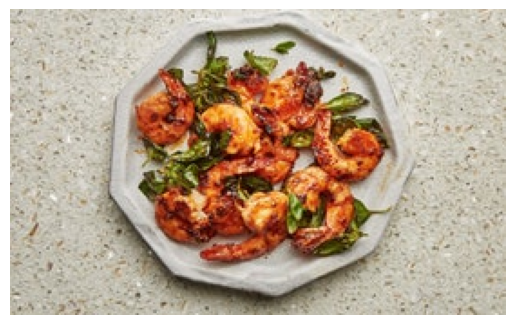

**Salteado de camarão com manjericão: para você arrasar na cozinha, meu querido Rafael**

**Ingredientes:**

- 3 pimentas Fresno picadinhas
- 6 dentinhos de alho amassadinhos
- 1/4 xícara de açúcar
- 2 colheres de sopa de molho de peixe
- 1 colher de chá de sal kosher (pode ser sal comum também)
- 4 colheres de sopa de óleo vegetal dividido (eu uso de semente de uva)
- 1 quilo de camarões grandes limpinhos e descascadinho
- 2 xícaras de folhas de manjericão (mais ou menos um maço)
- Gominhos de limão (pra dar aquela fresquinha na hora de servir)

**Assim que faz:**

1. Bate no liquidificador as pimentas, o alho, o açúcar, o molho de peixe, o sal e 3 colheres de sopa de óleo. Vai ficar um molhinho bem temperadinho.
2. Passa essa marinade pra uma tigela, coloca os camarões dentro e dá uma misturada pra eles ficarem bem envolvidinhos. Deixa os bichinhos descansando ali por uns 10 minutinhos.
3. Aquece o restante do óleo na tua frigideira favorita, aquela que não gruda, tá?
4. Quando o óle

In [36]:
img = mpimg.imread(receita_image)
plt.imshow(img)
plt.axis('off')
plt.show()
print(response.text)